<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:**Pablo Muñoz y Eduardo Loza

**Fecha:** 20 de octubre del 2020.

**Expediente** : If713423 y 
**Profesor:** Oscar David Jaramillo Zuluaga.
Liga repositorio: https://github.com/munoz97/Proyecto_Pablo_Eduardo

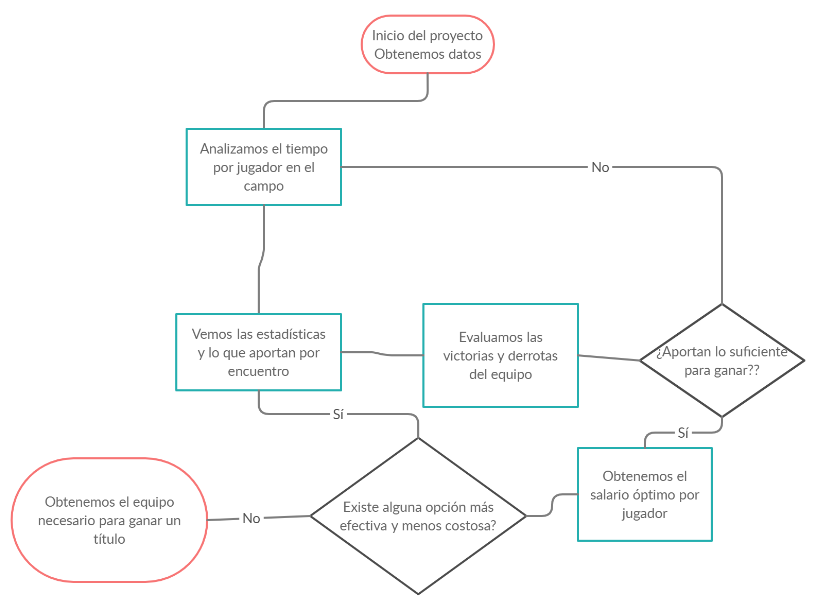

In [17]:
#Pablo
import numpy as np 
import pandas as pd
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
# Plotly Libraris


import warnings
warnings.filterwarnings("ignore")


### Objetivos.
> #### Objetivo general.
>  - Obtener equipo ideal de jugadores de NBA en cuanto a gasto-rendimiento
> ####  Objetivos específicos
>  - Conocer que jugadores son los mejores por posición en tanto gasto-rendimiento.
>  - Obtener presupuesto ideal para un equipo ganador.
>  - Generar probabilidad de ganar por equipo 

### Supuestos
> - Los equipos son de 10 jugadores con mayor tiempo de juego en la cancha
> - No se toman en cuenta bonos económicos de los jugadores.
> - No se incluye el valor del director técnico por equipo.

### Nodos o Escenarios
> - **Tiempo en cancha del jugador**: Conocer la importancia del jugador en el equipo.
> - **Numero de partidos (Ganados y perdidos)**: Generar la clasificación por equipo en la temporada.
> - **Estadisticas de juego por jugador (Depende la posición)**: Maximizar el rendimiento del jugador.
> - **Salario por jugador**: Obtener el salario óptimo para cada jugador.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.spatial.distance as sc
from scipy import stats 
import scipy.stats as st

%matplotlib inline

In [8]:
datos = pd.read_csv('nba_2016_2017_100.csv', header=0, engine = 'python')
datos

,ï»¿PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.500
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7.00,5.5,0,0.000
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.200,3.4,...,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2.0,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.0,1,1.220
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1,4.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,203080,Thomas Robinson,1610612747,LAL,26,48,15,33,0.313,11.7,...,337,56,5,"2,030,801,610,612,740",Thomas_Robinson_(basketball),trobinson0,1.05,5.0,1,0.126
96,202699,Tobias Harris,1610612765,DET,24,82,37,45,0.451,31.3,...,57,129,5,"2,026,991,610,612,760",Tobias_Harris,tobias31,16.00,16.0,1,0.022
97,203944,Julius Randle,1610612747,LAL,22,74,24,50,0.324,28.8,...,98,118,5,"2,039,441,610,612,740",Julius_Randle,j30_randle,3.28,13.2,1,0.358
98,1627767,Cheick Diallo,1610612740,NOP,20,17,9,8,0.529,11.7,...,314,146,5,"16,277,671,610,612,700",Cheick_Diallo,cheick_diallo13,1.31,5.1,1,0.015


## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 ¿Cómo ganar un campeonato?
En este proyecto, nos enfocaremos en analizar los datos históricos de los jugadores de la NBA, desde la producción de puntos por juegohasta el valor de su participación en la institución. Con el fin de poder hacer una mejor estrategia para ganar un campeonato. Tomando en cuenta las estadísticas podremos predecir la ruta para coronar a un equipo campeón.

### 1.2 Objetivos.
> - Se refieren a los propósitos por los cuales se hace el trabajo.
> - Deben ser concretos, evaluables y verificables.
> - Deben ser escritos en infinitivo.
> #### 1.1 Objetivo general.
>  - Fin último de estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.
> #### 1.2 Objetivos específicos
>  - De forma detallada describen cada una de los componentes del trabajo.
>  - En conjunto garantizan la consecución del objetivo general.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos

### 1.3 Definición del problema.
> Se debe describir en una cuartilla máximo cuál es el escenario de negocio que se va a modelar, identificar cuáles son los supuestos que defines en el negocio y cuáles son los "nodos" o "escenarios" que identificas necesarios simular y porqué. Debes elaborar un diagrama de inicio a fin, identificando los "nodos" o "escenarios" a simular.

### 1.4 Nodos y variables que se decidieron simular y porqué
> En este apartado el objetivo es identificar los problemas que se van a abordar, para examinar la factibilidad y viabilidad de la simulación de los nodos escogidos. Posteriormente se debe de argumentar del porqué de los nodos escogidos.

### 1.5 Definición de hipótesis y supuestos.
>  Para poder modelar un proceso de negocio o cualquiera otro proceso en el área de las ingenierías o ciencias sociales, después de identificar el objeto de estudio, es importante indicar cuales son los supuestos que se dan por verdaderos a lo largo de la ejecución del proceso. Estos supuestos se deben indicar en forma de variables e hipótesis (son diferentes), porque si puedes definir en un valor el supuesto lo llamaremos "supuesto constante" y si no es posible identificarlo con un número entonces será una hipótesis que afectará la construcción de los escenarios posibles del proceso.

### 1.6 Obtención de bases de datos
> El tercer paso del proyecto es indicar de dónde se obtendrán las bases de datos, que indican como se han comportado las variables que identificaste en tu proceso de negocio que vas a simular. En esta investigación debes haber encontrado información propia de la empresa, organización o institución que vas a simular y otra parte de la información debe provenir de investigación que realices en fuentes de información públicas o privadas como las que tiene SECOBI, ahí normalmente y dependiendo del problema elegido, se investigan variables económicas, como tasas de interés, inflación, tipo de cambio, etc., de varios años, por poner un ejemplo.

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.